In [350]:
def acao(destino, custo):
    return {"destino": destino, "custo": custo}

estados_romenia = [
    {"estado": "Arad", "acoes": [acao("Zerind", 75), acao("Sibiu", 140), acao("Timisoara", 118)]},
    {"estado": "Zerind", "acoes": [acao("Arad", 75), acao("Oradea", 71)]},
    {"estado": "Timisoara", "acoes": [acao("Arad", 118), acao("Lugoj", 111)]},
    {"estado": "Sibiu","acoes": [acao("Arad", 140), acao("Oradea", 151), acao("Fagaras", 99), acao("Rimnicu Vilcea", 80)]},
    {"estado": "Oradea", "acoes": [acao("Zerind", 71), acao("Sibiu", 151)]},
    {"estado": "Lugoj", "acoes": [acao("Timisoara", 111), acao("Mehadia", 70)]},
    {"estado": "Mehadia", "acoes": [acao("Lugoj", 70), acao("Drobeta", 75)]},
    {"estado": "Drobeta", "acoes": [acao("Mehadia", 75), acao("Craiova", 120)]},
    {"estado": "Craiova", "acoes": [acao("Drobeta", 120), acao("Rimnicu Vilcea", 146), acao("Pitesti", 138)]},
    {"estado": "Rimnicu Vilcea", "acoes": [acao("Sibiu", 80), acao("Craiova", 146), acao("Pitesti", 97)]},
    {"estado": "Fagaras", "acoes": [acao("Sibiu", 99), acao("Bucharest", 211)]},
    {"estado": "Pitesti", "acoes": [acao("Rimnicu Vilcea", 97), acao("Craiova", 138), acao("Bucharest", 101)]},
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 90)]},
    {"estado": "Bucharest", "acoes": [acao("Fagaras", 211), acao("Pitesti", 101), acao("Giurgiu", 90), acao("Urziceni", 85)]},
    {"estado": "Urziceni", "acoes": [acao("Bucharest", 85), acao("Vaslui", 142), acao("Hirsova", 98)]},
    {"estado": "Hirsova", "acoes": [acao("Urziceni", 98), acao("Eforie", 86)]},
    {"estado": "Eforie", "acoes": [acao("Hirsova", 86)]},
    {"estado": "Vaslui", "acoes": [acao("Urziceni", 142), acao("Iasi", 92)]},
    {"estado": "Iasi", "acoes": [acao("Vaslui", 92), acao("Neamt", 87)]},
    {"estado": "Neamt", "acoes": [acao("Iasi", 87)]}
]

def ilustrar_percurso(percurso):
    for i in range(len(percurso)-1):
        print(percurso[i], end=" -> ")
    print(percurso[-1])

def get_estado(estado):
    for e in estados_romenia:
        if e["estado"] == estado:
            return e
    return None

def get_all_acoes(estado):
    return estado["acoes"]

def get_custos(estado):
    custos = []
    for acao in get_all_acoes(get_estado(estado)):
        custos.append(acao["custo"])
    return custos

def get_all_destinos(estado):
    destinos = []
    for acao in get_all_acoes(get_estado(estado)):
        destinos.append(acao["destino"])
    return destinos

def get_custo(estado, destino):
    for acao in get_all_acoes(get_estado(estado)):
        if acao["destino"] == destino:
            return acao["custo"]
    return False

#Depth-first search
def dfs(start, goal):
    fronteiras = [start]
    percurso = []
    custo_total = 0
    while fronteiras:
        estado = fronteiras.pop() #Simulando uma pilha
        percurso.append(estado)
        if estado == goal:
            print("DFS: Fim!")
            print("Custo total:", custo_total)
            return (percurso, custo_total)
        else:
            for acao in get_all_acoes(get_estado(estado)):
                if acao["destino"] not in percurso and acao["destino"] not in fronteiras:
                    if acao["destino"] == goal:
                        fronteiras.insert(0, acao["destino"])
                    else:
                        fronteiras.append(acao["destino"])
        print(f"Estado atual: {estado}\nFronteiras: {fronteiras}\nPercurso até o momento: {percurso}\n")
        #input("Pressione enter para continuar...")
    return False
 
#Breadth-first search
def bfs(start, goal):
    fronteiras = [start]
    percurso = []
    custo_total = 0
    while fronteiras:
        estado = fronteiras.pop(0) #Simulando uma fila
        percurso.append(estado)
        if estado == goal:   
            print("BFS: Fim!")
            print("Custo total:", custo_total)
            return (percurso, custo_total)
        else:
            for acao in get_all_acoes(get_estado(estado)):
                if acao["destino"] not in percurso and acao["destino"] not in fronteiras:
                    if acao["destino"] == goal:
                        fronteiras.insert(0, acao["destino"])
                        custo_total += acao["custo"]
                    else:
                        fronteiras.append(acao["destino"])
                        custo_total += acao["custo"]
        print(f"Estado atual: {estado}\nFronteiras: {fronteiras}\nPercurso até o momento: {percurso}\n")
        #input("Pressione enter para continuar...")
    return False

In [311]:
"Bucharest" in get_all_destinos("Fagaras")

True

In [322]:
for acao in get_all_acoes(get_estado("Fagaras")):
    print(acao["destino"])

Sibiu
Bucharest


In [352]:
dfs_path, dfs_cost = dfs("Arad", "Bucharest")

Estado atual: Arad
Fronteiras: ['Zerind', 'Sibiu', 'Timisoara']
Percurso até o momento: ['Arad']

Estado atual: Timisoara
Fronteiras: ['Zerind', 'Sibiu', 'Lugoj']
Percurso até o momento: ['Arad', 'Timisoara']

Estado atual: Lugoj
Fronteiras: ['Zerind', 'Sibiu', 'Mehadia']
Percurso até o momento: ['Arad', 'Timisoara', 'Lugoj']

Estado atual: Mehadia
Fronteiras: ['Zerind', 'Sibiu', 'Drobeta']
Percurso até o momento: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia']

Estado atual: Drobeta
Fronteiras: ['Zerind', 'Sibiu', 'Craiova']
Percurso até o momento: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta']

Estado atual: Craiova
Fronteiras: ['Zerind', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti']
Percurso até o momento: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova']

Estado atual: Pitesti
Fronteiras: ['Bucharest', 'Zerind', 'Sibiu', 'Rimnicu Vilcea']
Percurso até o momento: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti']

Estado atual: Rimnicu Vilcea
Fronteiras

In [351]:
bfs_path, bfs_cost = bfs("Arad", "Bucharest")

Estado atual: Arad
Fronteiras: ['Zerind', 'Sibiu', 'Timisoara']
Percurso até o momento: ['Arad']

Estado atual: Zerind
Fronteiras: ['Sibiu', 'Timisoara', 'Oradea']
Percurso até o momento: ['Arad', 'Zerind']

Estado atual: Sibiu
Fronteiras: ['Timisoara', 'Oradea', 'Fagaras', 'Rimnicu Vilcea']
Percurso até o momento: ['Arad', 'Zerind', 'Sibiu']

Estado atual: Timisoara
Fronteiras: ['Oradea', 'Fagaras', 'Rimnicu Vilcea', 'Lugoj']
Percurso até o momento: ['Arad', 'Zerind', 'Sibiu', 'Timisoara']

Estado atual: Oradea
Fronteiras: ['Fagaras', 'Rimnicu Vilcea', 'Lugoj']
Percurso até o momento: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea']

Estado atual: Fagaras
Fronteiras: ['Bucharest', 'Rimnicu Vilcea', 'Lugoj']
Percurso até o momento: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea', 'Fagaras']

BFS: Fim!
Custo total: 905


In [331]:
custo_total = 0
custo_total += get_custos("Bucharest")[get_all_destinos("Bucharest").index("Bucharest")]

ValueError: 'Bucharest' is not in list

In [333]:
get_all_destinos("Bucharest")

['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni']

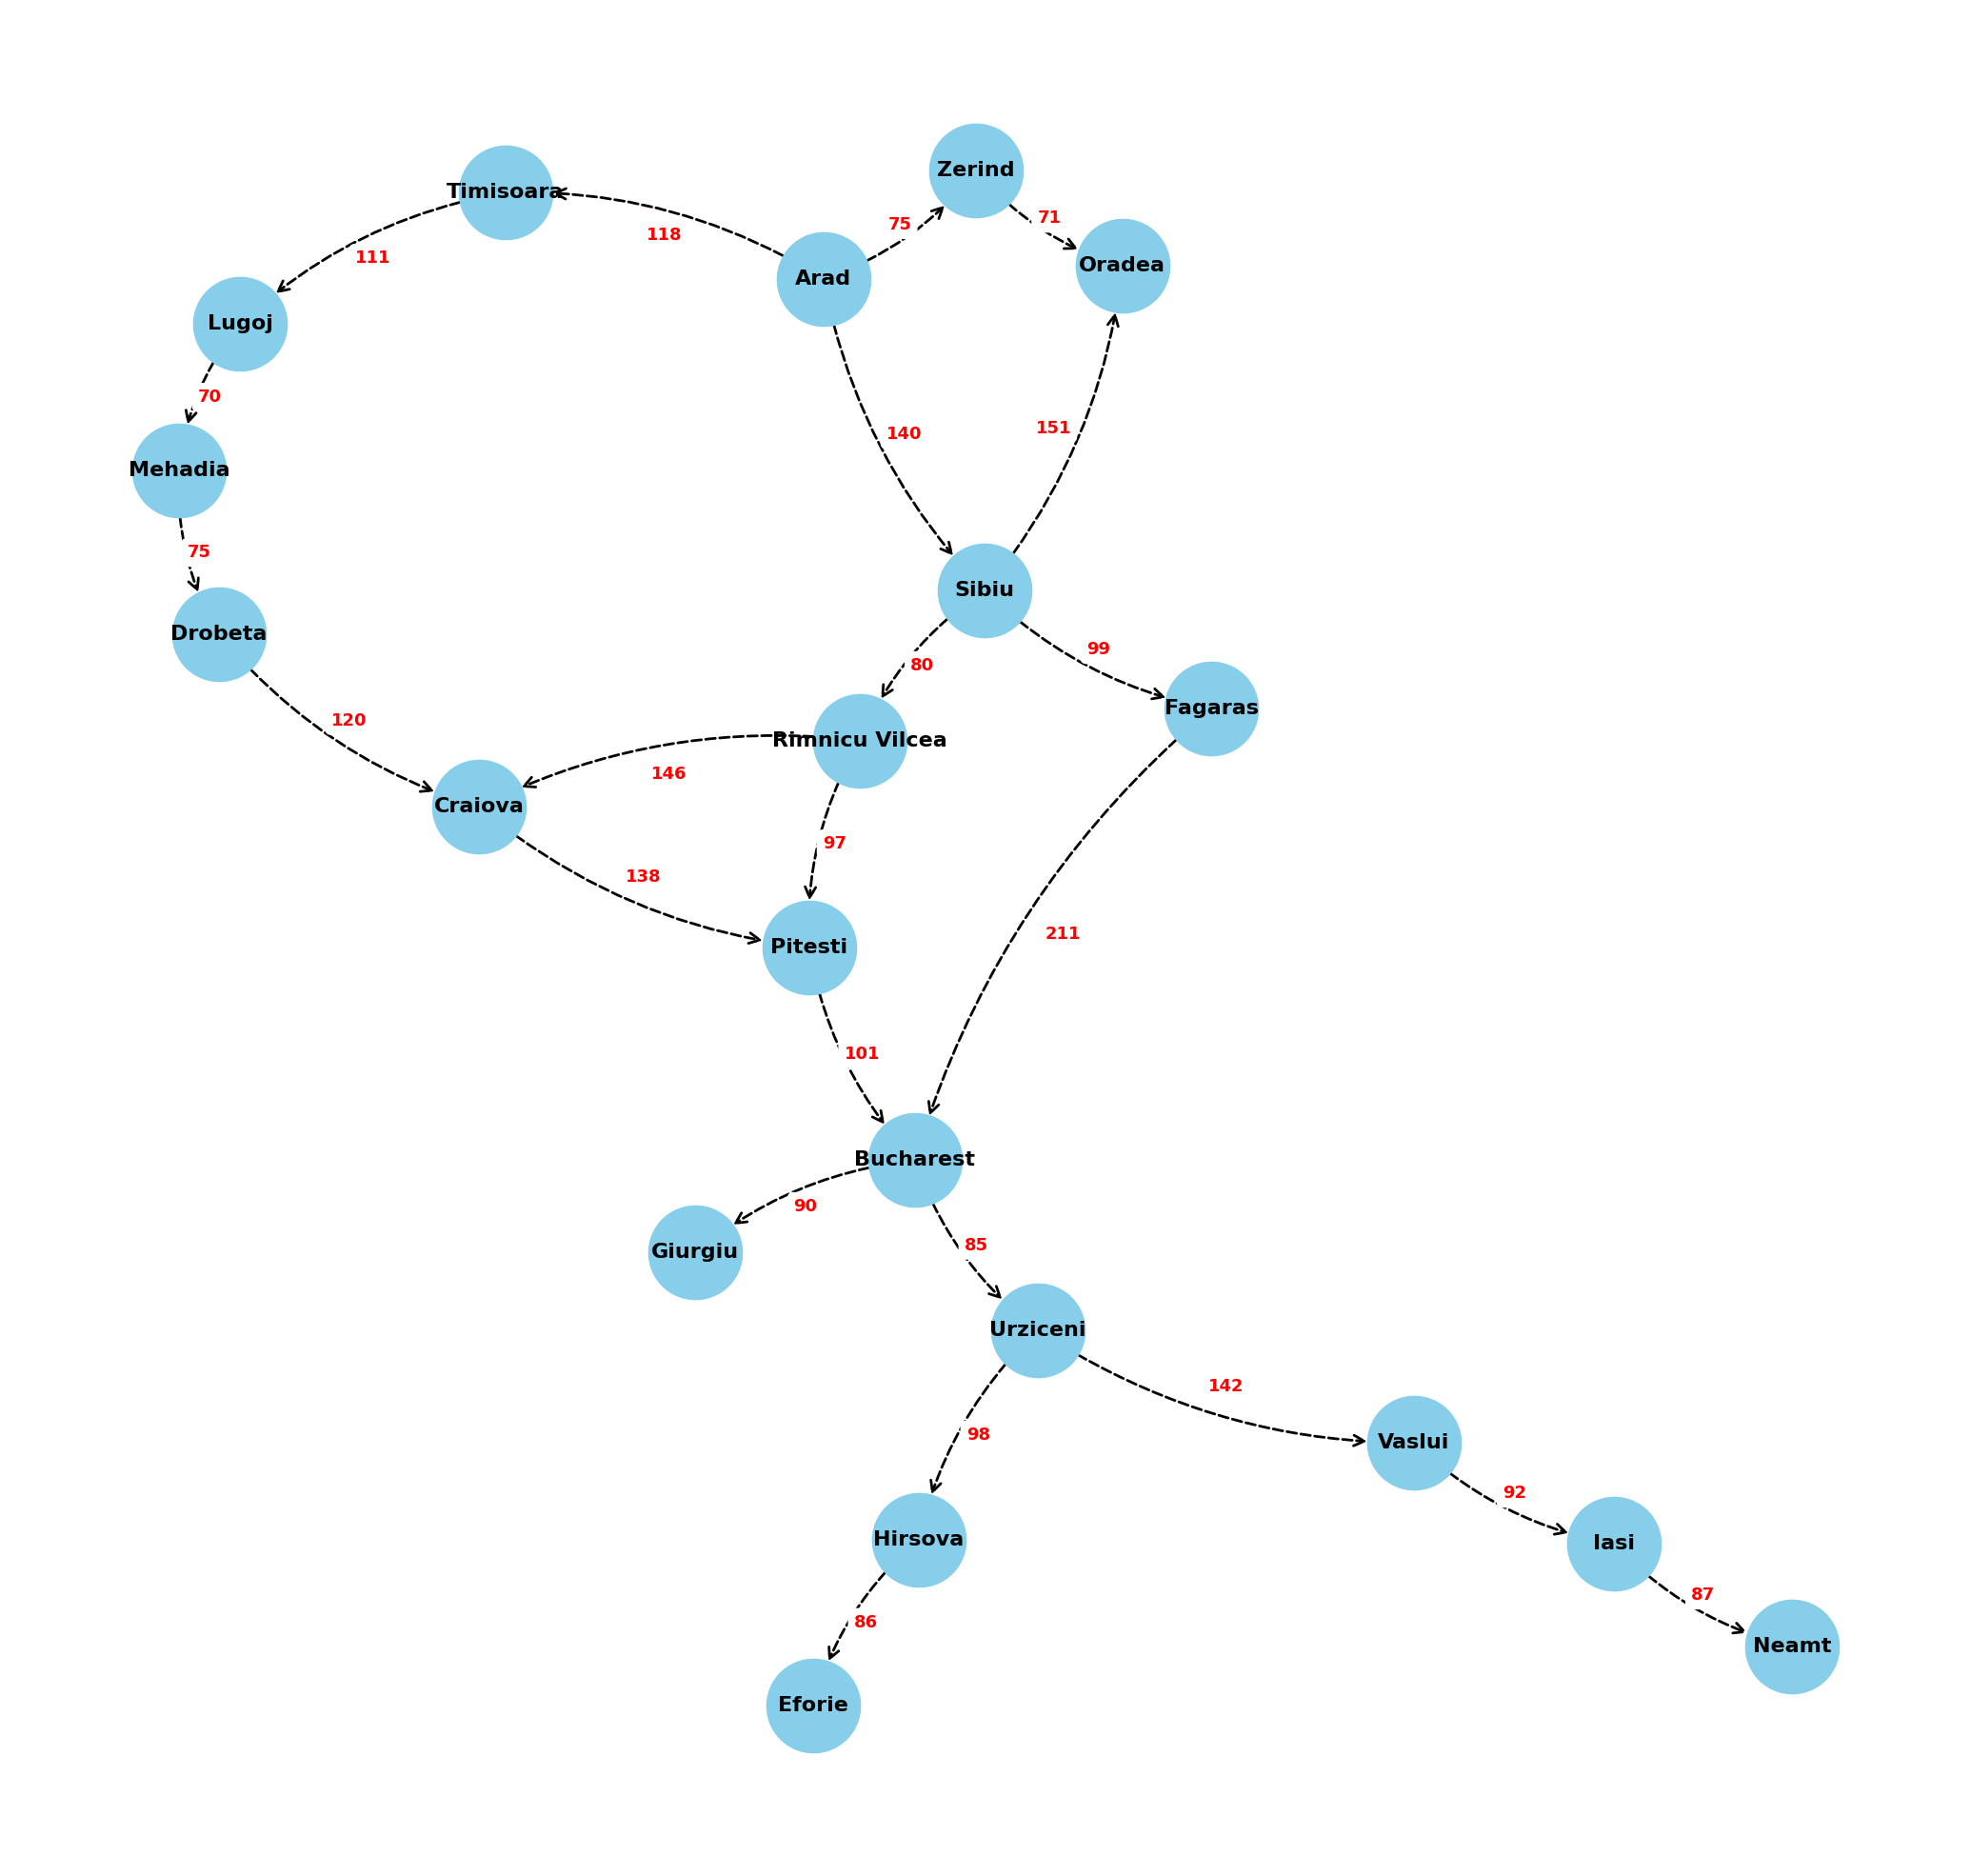

In [195]:
#Create a graph of the romenia map using networkx
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for estado in estados_romenia:
    for acao in estado["acoes"]:
        G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=5000, node_color='skyblue', font_size=16, width=2, edge_color='black',
alpha=1, arrows=True, arrowstyle='->',  arrowsize=20, connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1
, linewidths=1, label='Romenia', font_family='sans-serif')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=13, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
#increase the size of the graph
fig = plt.gcf()
fig.set_size_inches(20.5, 19.5)
plt.show()

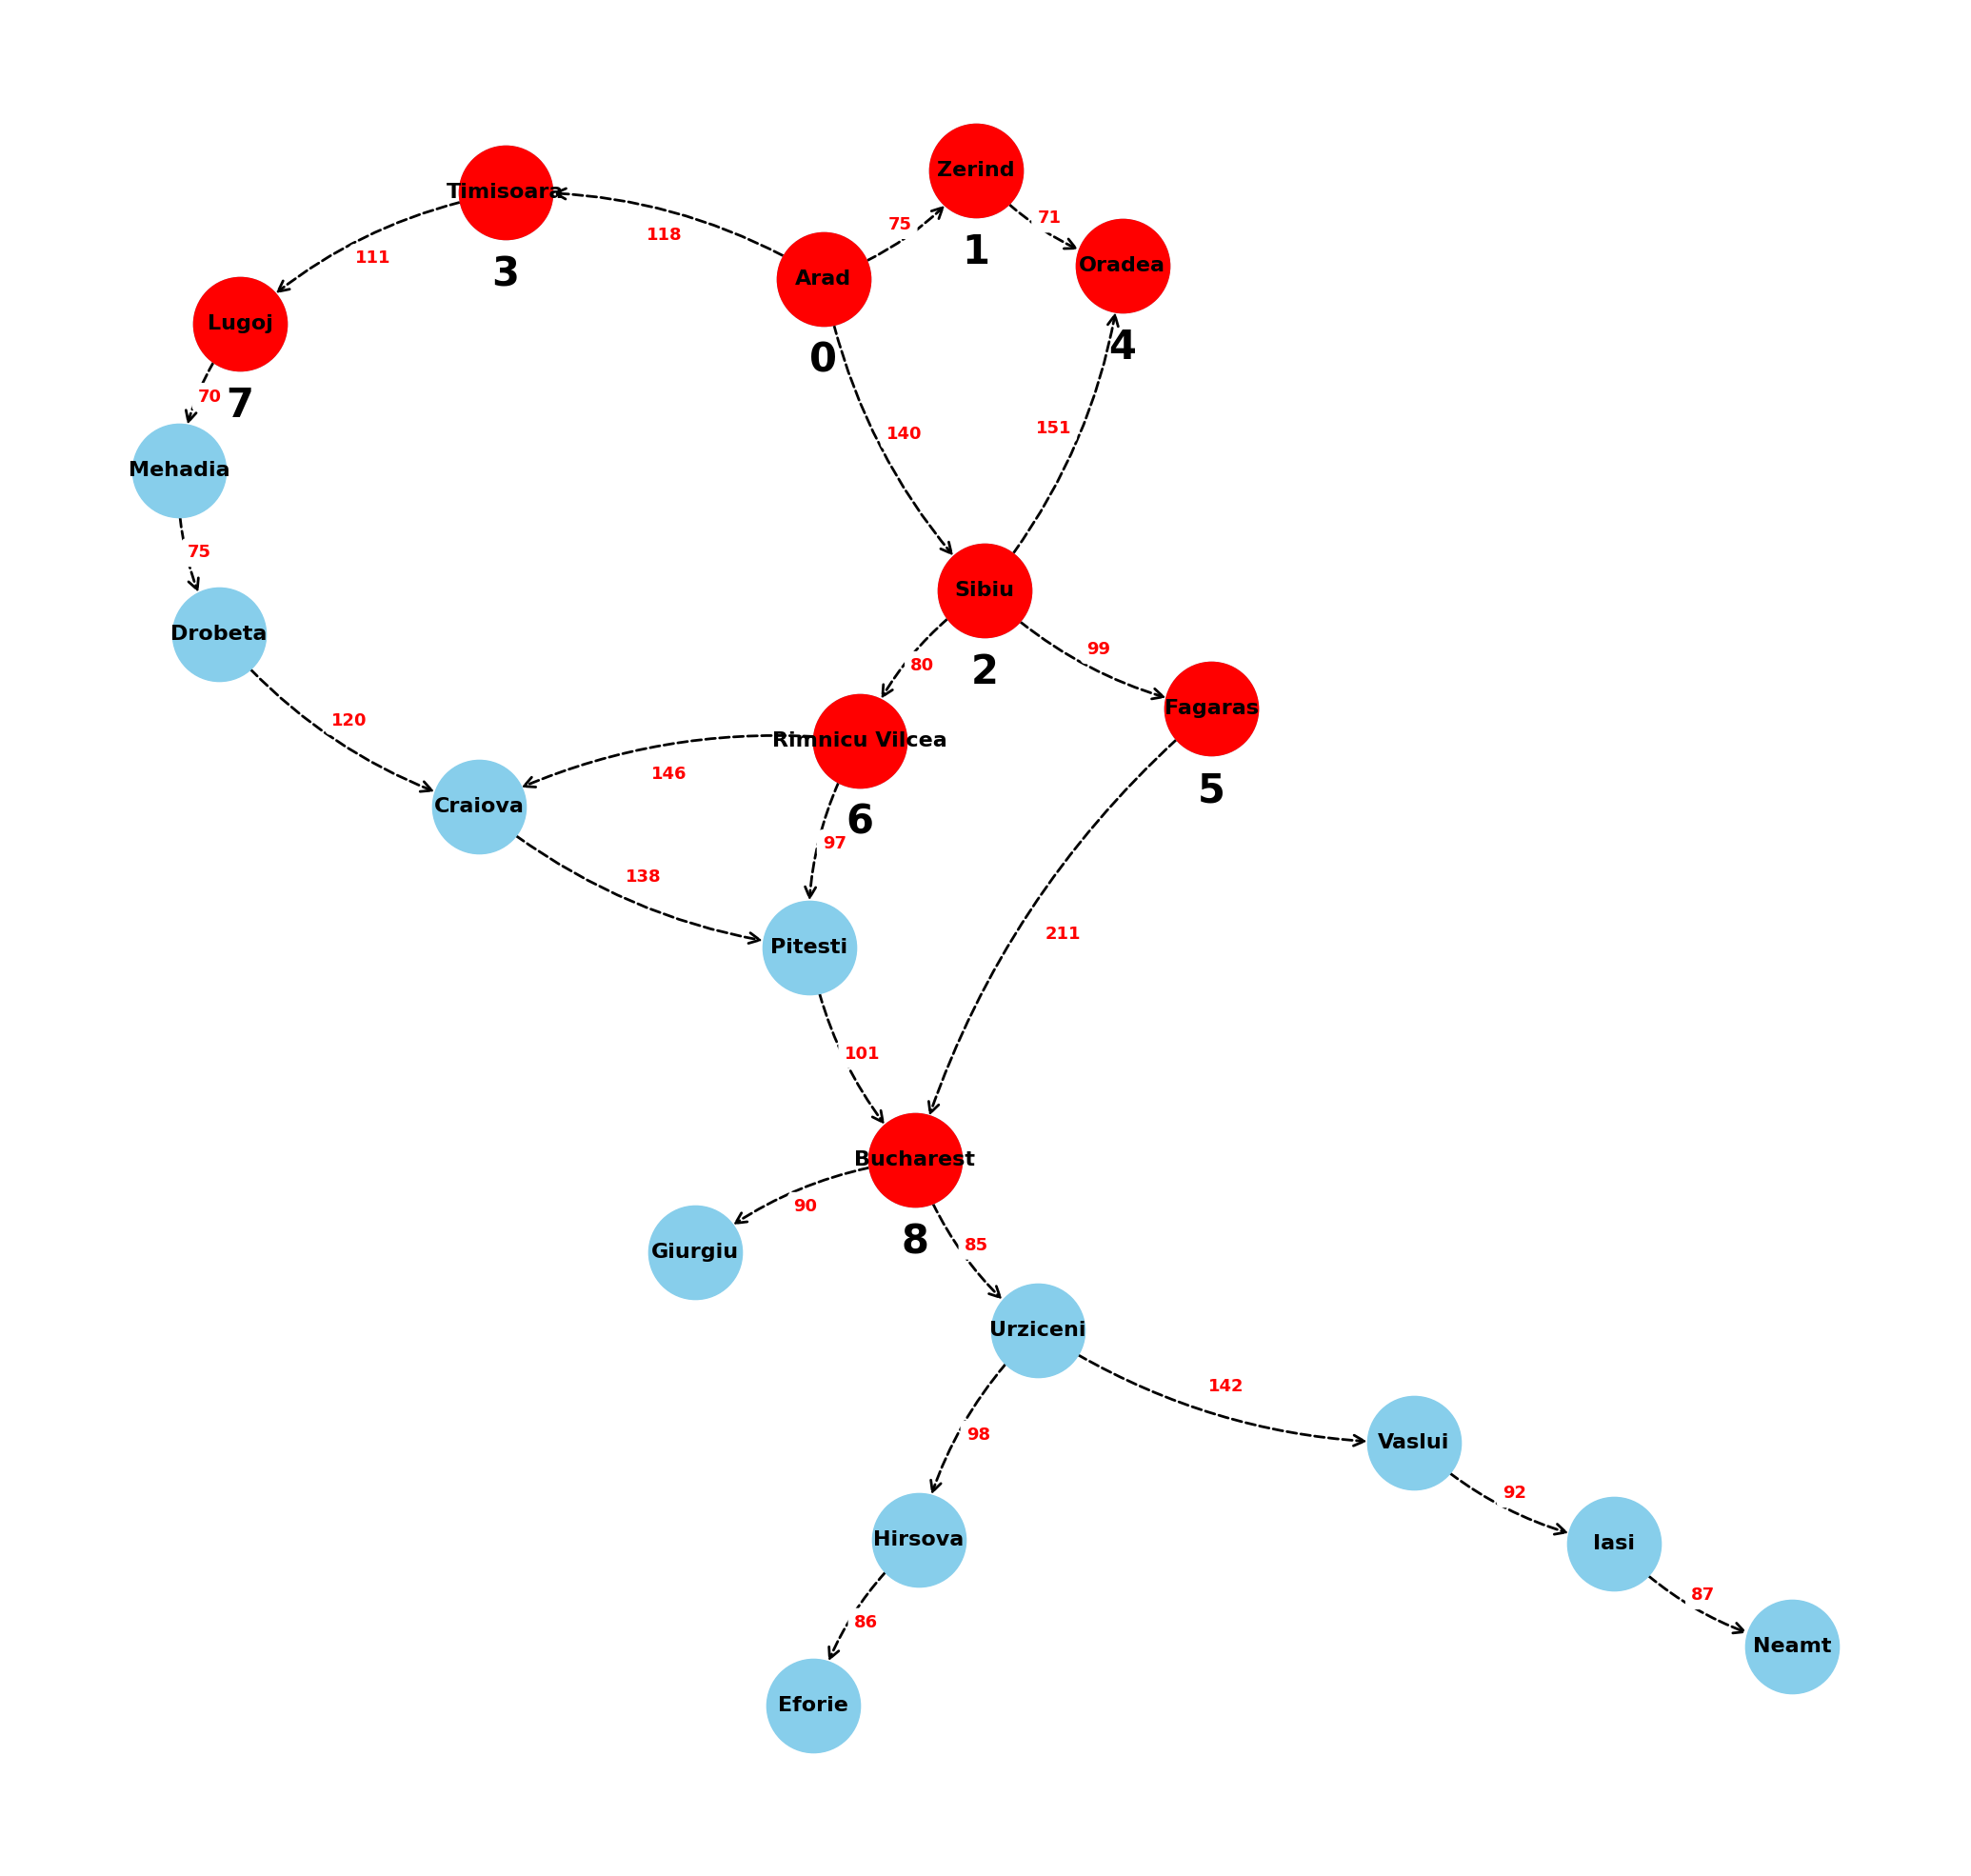

In [239]:
#Create a graph of the romenia map using networkx
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for estado in estados_romenia:
    for acao in estado["acoes"]:
        G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=5000, node_color='skyblue', font_size=16, width=2, edge_color='black',
alpha=1, arrows=True, arrowstyle='->',  arrowsize=20, connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1
, linewidths=1, label='Romenia', font_family='sans-serif')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=13, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
#increase the size of the graph
fig = plt.gcf()
fig.set_size_inches(20.5, 19.5)

#For each state in bfs_path, highlight the path in red and the node in yellow, also add add numbers to the nodes according to the order they were visited
for estado in bfs_path:
    nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=5000, alpha=1)
    #Put numbers on top of the nodes according to the order they were visited
    plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(bfs_path.index(estado)), fontsize=30, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center')

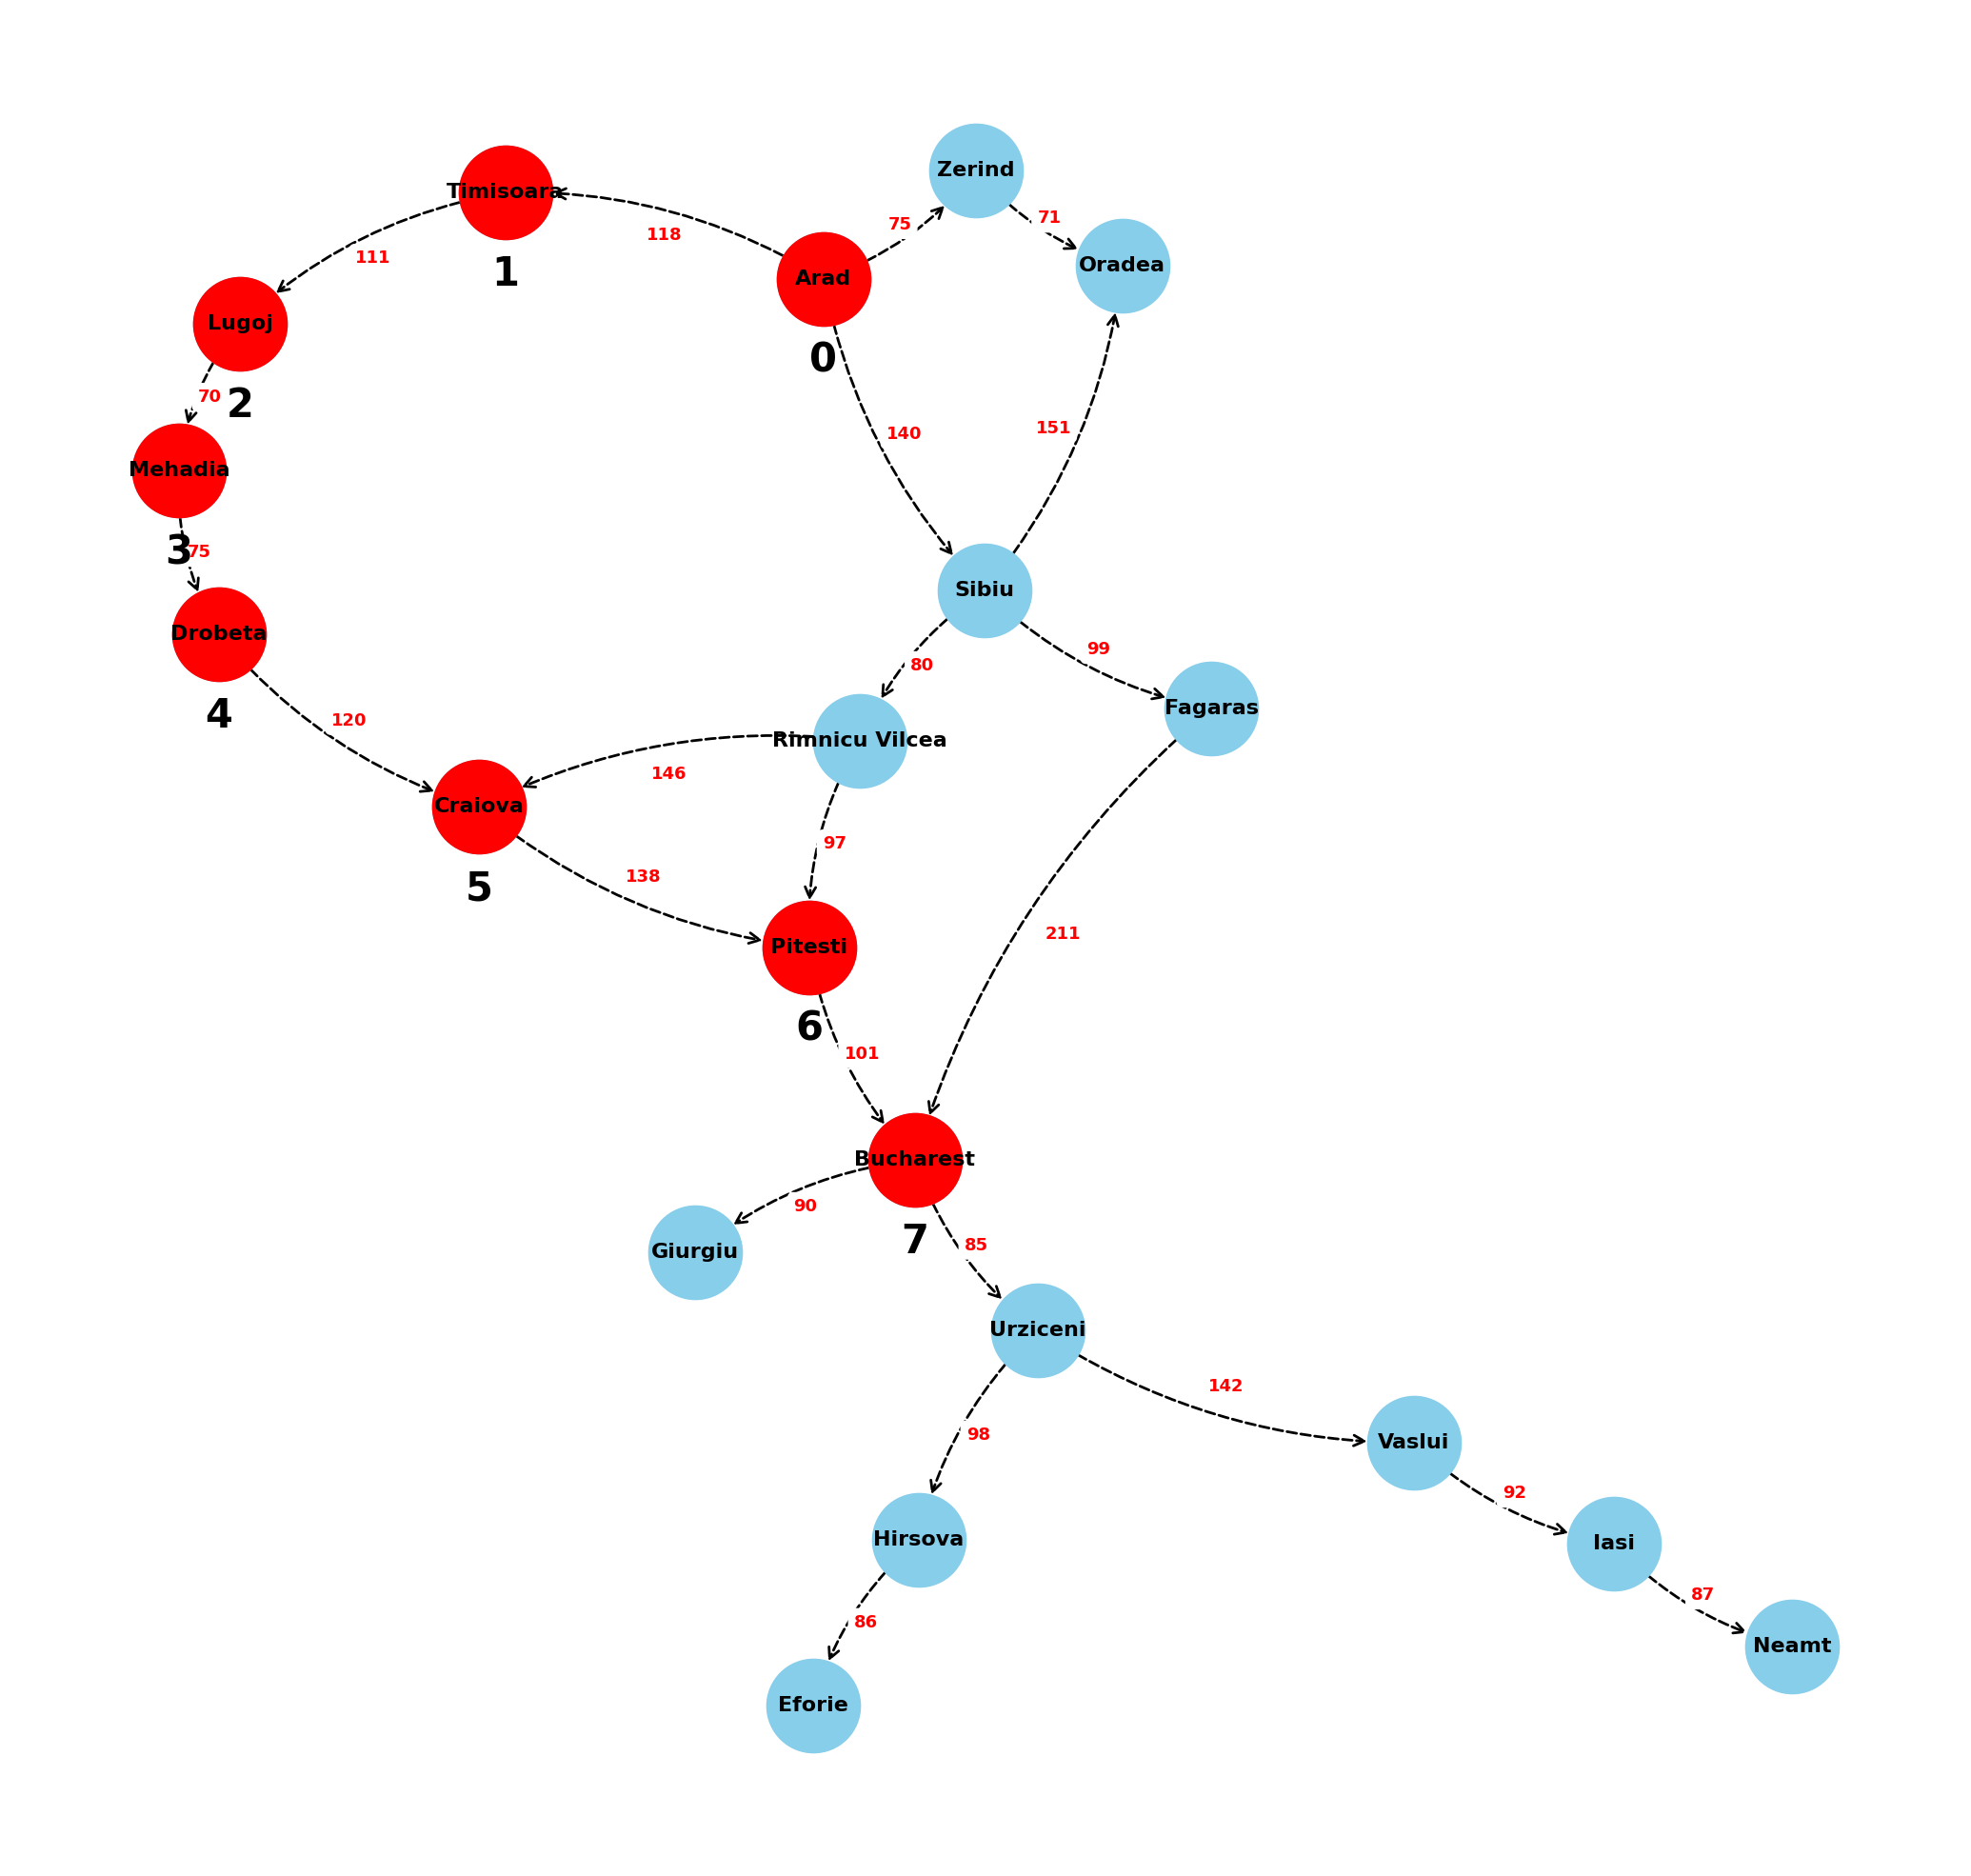

In [240]:
#Create a graph of the romenia map using networkx
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for estado in estados_romenia:
    for acao in estado["acoes"]:
        G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=5000, node_color='skyblue', font_size=16, width=2, edge_color='black',
alpha=1, arrows=True, arrowstyle='->',  arrowsize=20, connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1
, linewidths=1, label='Romenia', font_family='sans-serif')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=13, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
#increase the size of the graph
fig = plt.gcf()
fig.set_size_inches(20.5, 19.5)

#Change the node color of Arad to red

for estado in dfs_path:
    nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=5000, alpha=1)
    #Put numbers on top of the nodes according to the order they were visited
    plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(dfs_path.index(estado)), fontsize=30, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center')

#Wrap the code in a function that only takes the path as an argument


In [289]:
def highlight_path(path, cost):
    G = nx.Graph()
    for estado in estados_romenia:
        for acao in estado["acoes"]:
            G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=5000, node_color='skyblue', font_size=16, width=2, edge_color='black',
    alpha=1, arrows=True, arrowstyle='->',  arrowsize=20, connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1
    , linewidths=1, label='Romenia', font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=13, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
    #increase the size of the graph
    fig = plt.gcf()
    fig.set_size_inches(20.5, 19.5)

    #For each state in path, highlight the path in red and the node in yellow, also add add numbers to the nodes according to the order they were visited
    for estado in path:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=5000, alpha=1)
        #Put numbers on top of the nodes according to the order they were visited
        plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(path.index(estado)), fontsize=30, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center')
    #Draw a square on the corner of the graph to show the cost
    plt.title(f"Custo total: {cost}", fontsize=30, fontweight='bold', color='black', loc='left', horizontalalignment='center', verticalalignment='center')

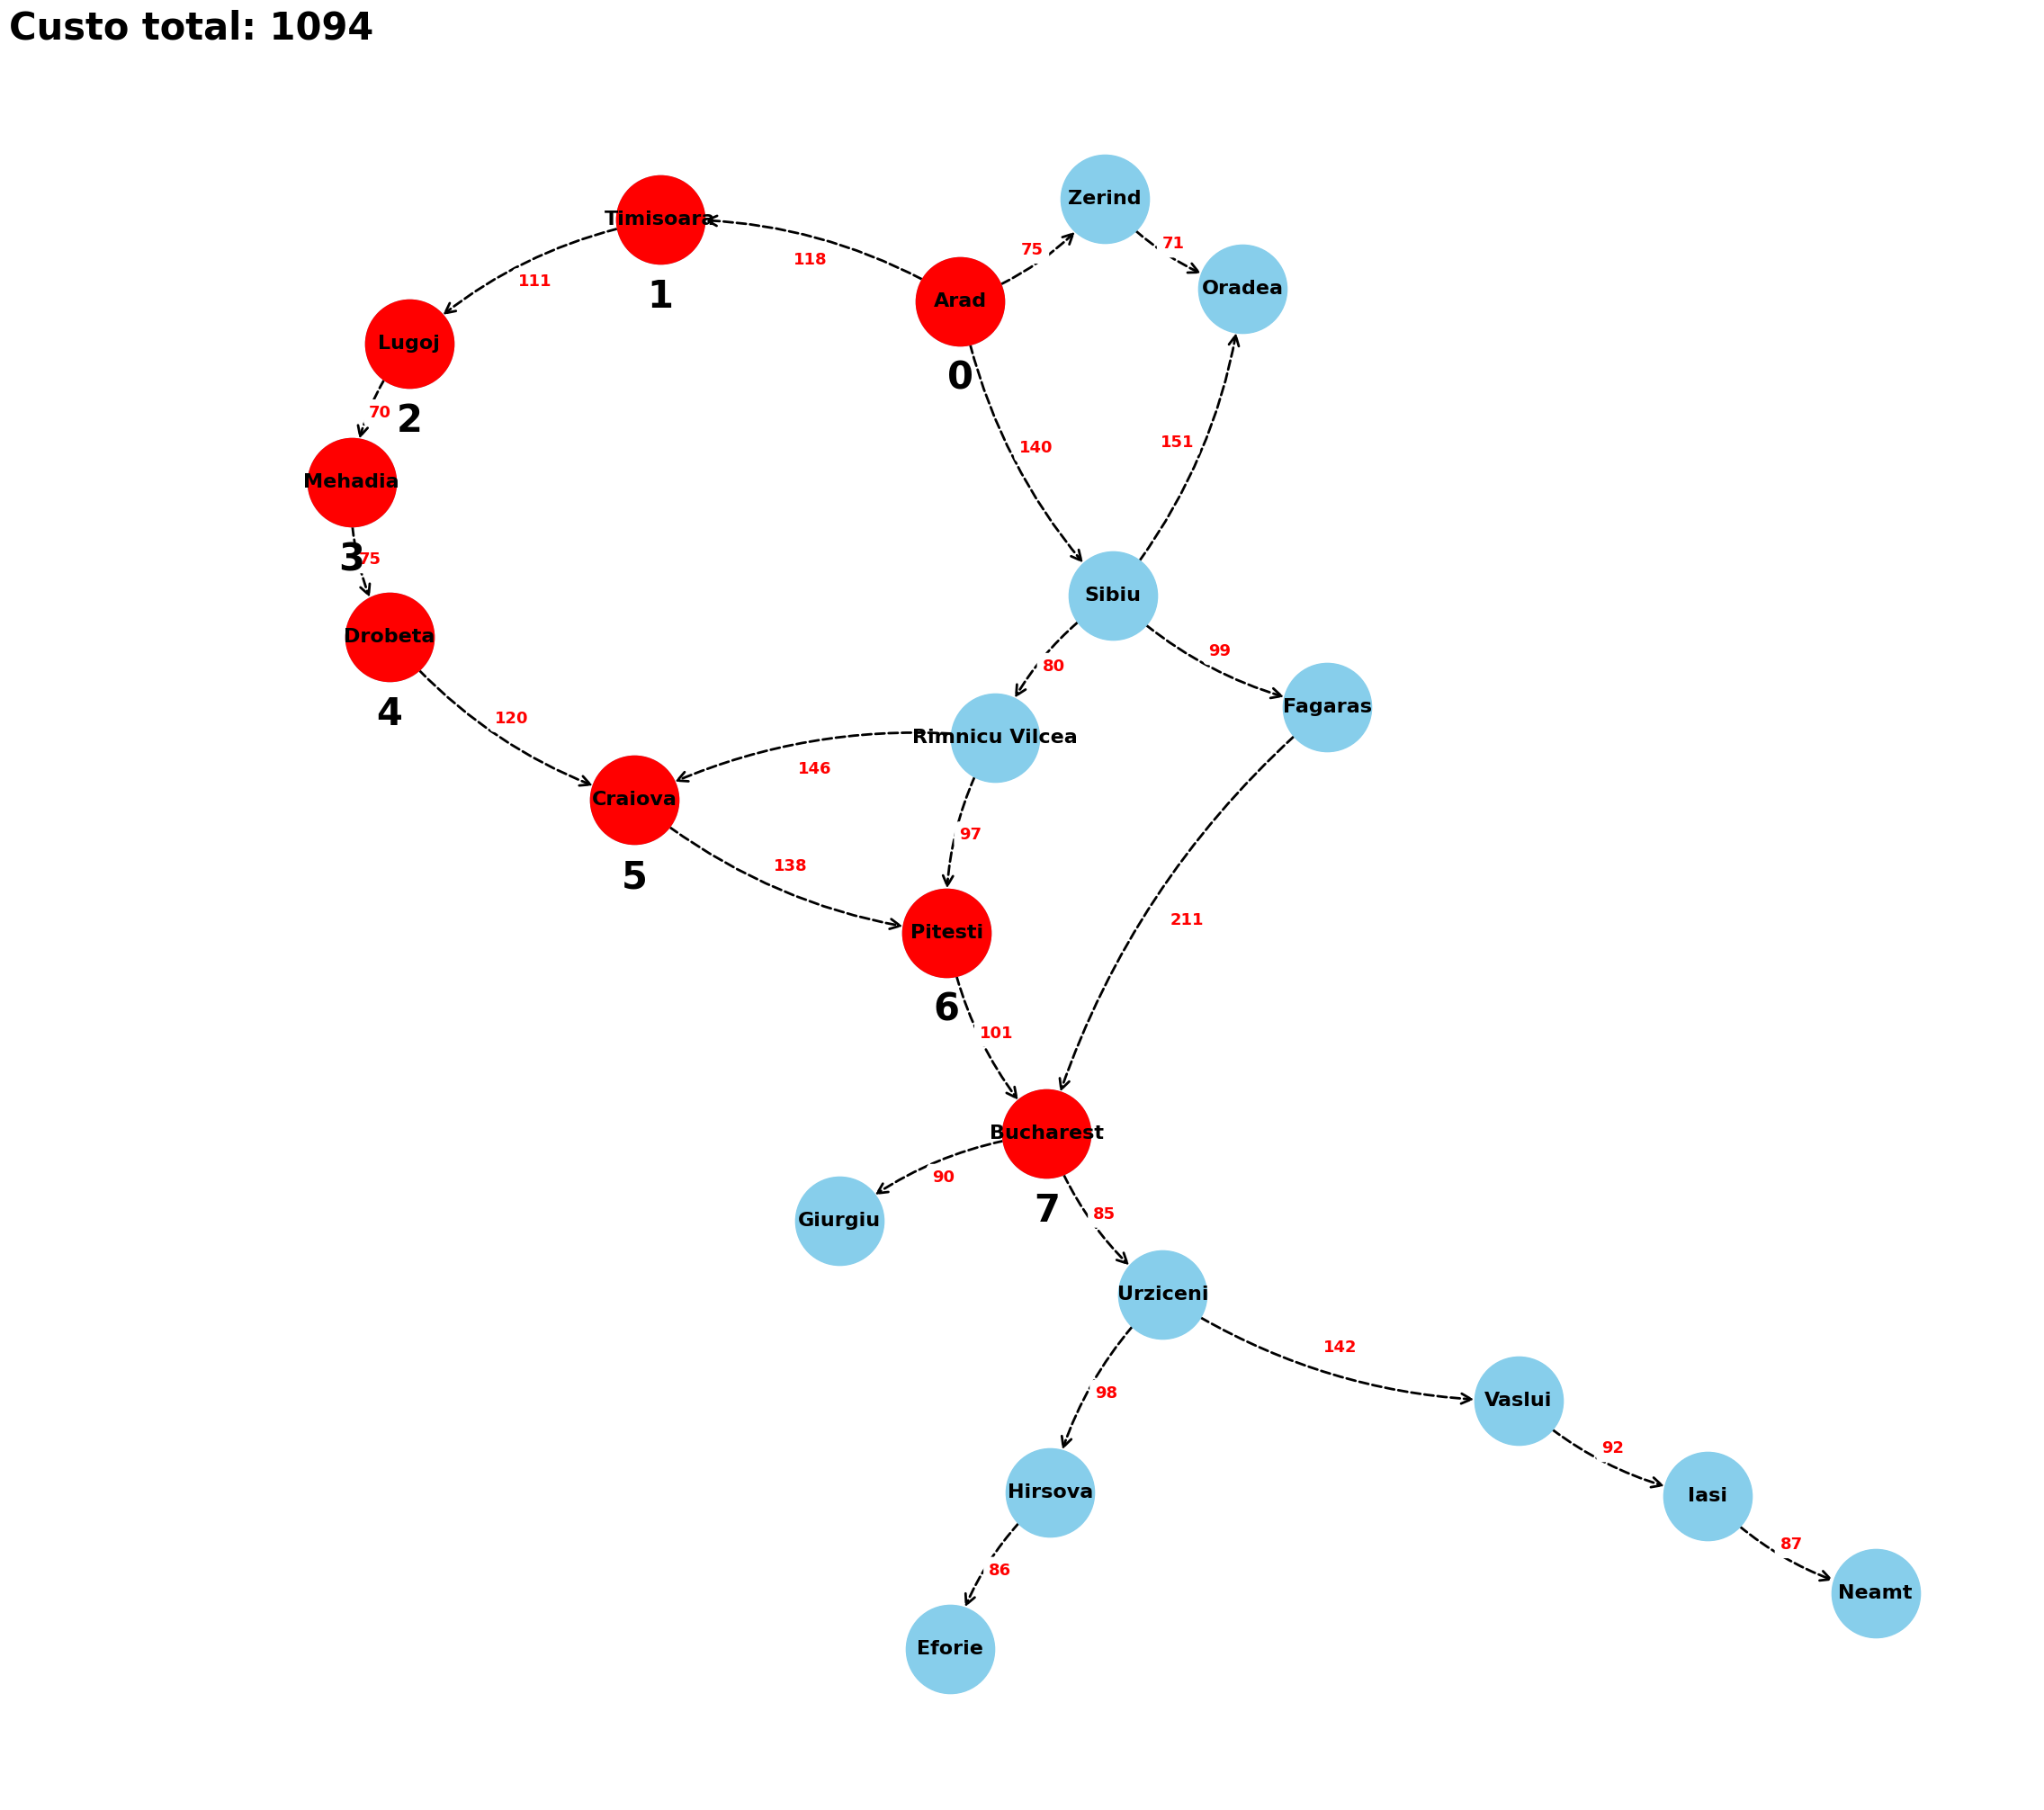

In [290]:
highlight_path(dfs_path, dfs_cost)